In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

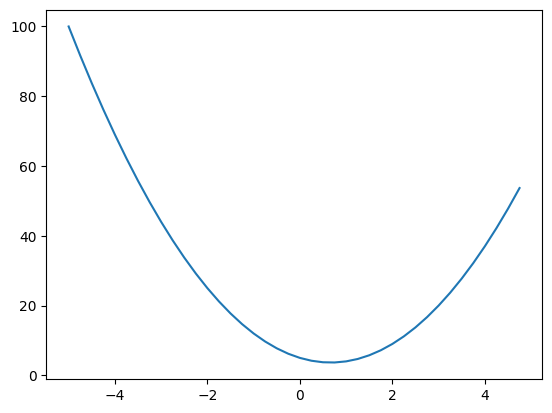

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

In [ ]:
# les get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


In [ ]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


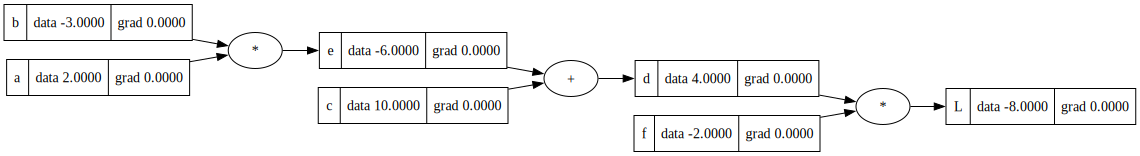

In [ ]:
draw_dot(L)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)


-8.0


In [ ]:
def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data
  
  print((L2 - L1)/h)
  
lol()

-3.9999999999995595


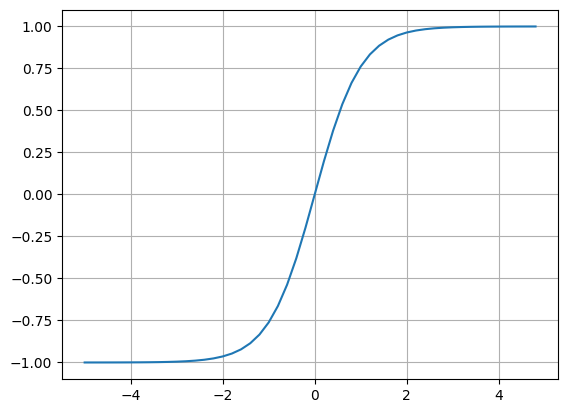

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

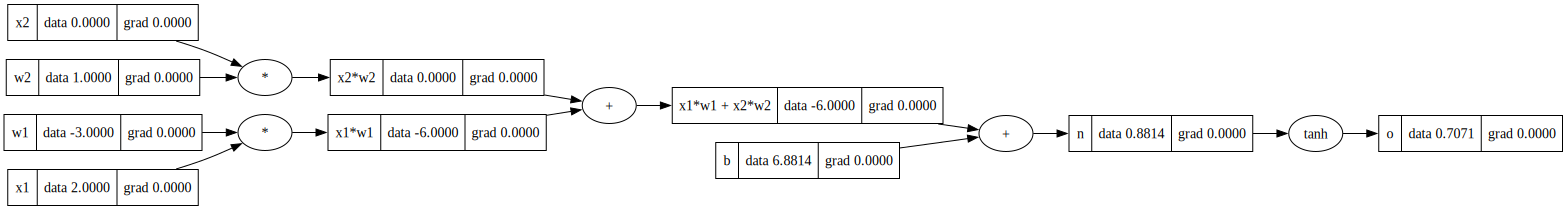

In [ ]:
draw_dot(o)

In [ ]:
o.backward()

In [ ]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [ ]:
o.grad = 1.0

In [ ]:
o._backward()

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()
x1w1._backward()

In [ ]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [ ]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [ ]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [ ]:
n.grad = 0.5

In [ ]:
o.grad = 1.0

In [ ]:
1 - o.data**2

0.4999999999999999

In [ ]:
# o = tanh(n)
# do/dn = 1 - o**2

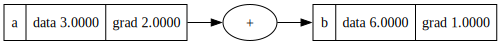

In [ ]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

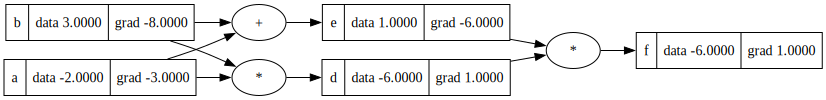

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

# Extra Modern Gradient Visualizations 🔥

Let's visualize gradients in more intuitive ways!

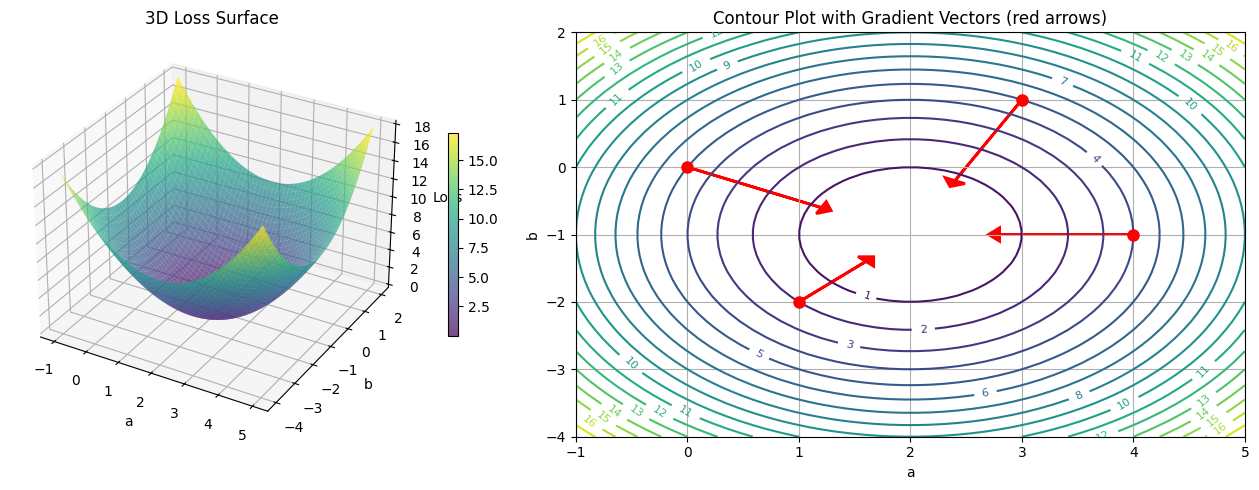

In [ ]:
# 1. 3D Surface Plot with Gradient Vectors
from mpl_toolkits.mplot3d import Axes3D

# Define a simple loss function L(a, b) = (a - 2)**2 + (b + 1)**2
def loss_function(a, b):
    return (a - 2)**2 + (b + 1)**2

# Create a grid of a, b values
a_range = np.linspace(-1, 5, 50)
b_range = np.linspace(-4, 2, 50)
A, B = np.meshgrid(a_range, b_range)
L = loss_function(A, B)

# Create 3D plot
fig = plt.figure(figsize=(14, 5))

# 3D Surface
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(A, B, L, cmap='viridis', alpha=0.7)
ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax1.set_zlabel('Loss')
ax1.set_title('3D Loss Surface')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot with gradient vectors
ax2 = fig.add_subplot(122)
contour = ax2.contour(A, B, L, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)

# Add gradient vectors at sample points
sample_points = [(0, 0), (1, -2), (3, 1), (4, -1)]
for a_val, b_val in sample_points:
    # Gradient: dL/da = 2(a-2), dL/db = 2(b+1)
    grad_a = 2 * (a_val - 2)
    grad_b = 2 * (b_val + 1)
    
    # Plot point
    ax2.plot(a_val, b_val, 'ro', markersize=8)
    
    # Plot gradient vector (negative for descent direction)
    ax2.arrow(a_val, b_val, -grad_a*0.3, -grad_b*0.3, 
             head_width=0.2, head_length=0.1, fc='red', ec='red', linewidth=2)
    
ax2.set_xlabel('a')
ax2.set_ylabel('b')
ax2.set_title('Contour Plot with Gradient Vectors (red arrows)')
ax2.grid(True)

plt.tight_layout()
plt.show()

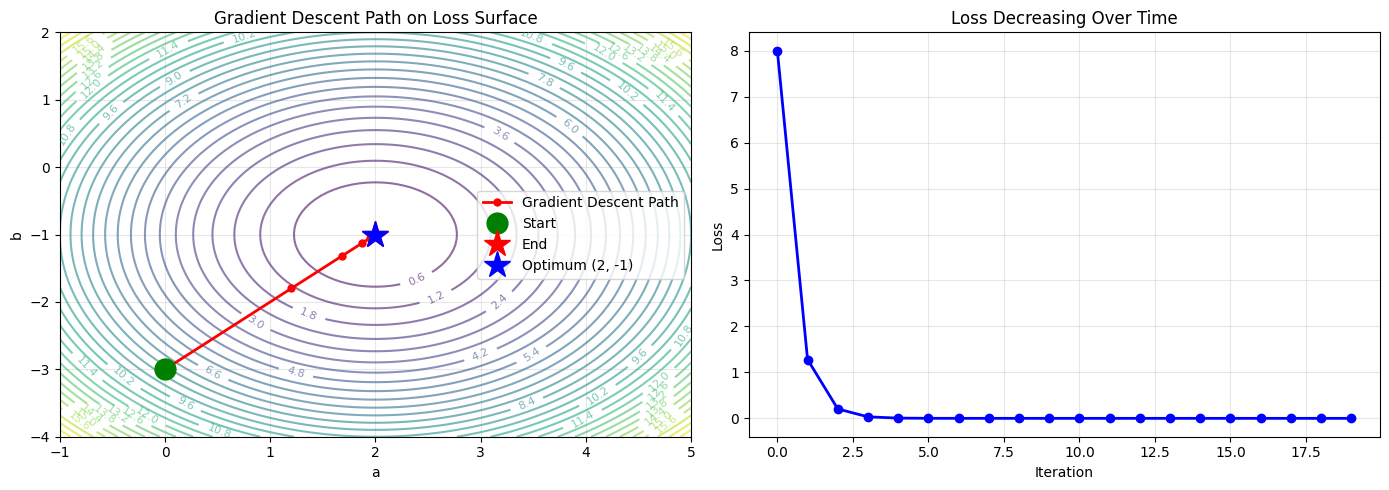

Started at: a=0.000, b=-3.000, loss=8.000
Ended at: a=2.000, b=-1.000, loss=0.000000
Optimal point: a=2.0, b=-1.0, loss=0.0


In [ ]:
# 2. Gradient Descent Animation - Show the path!
# Let's trace gradient descent on our Value class

a = Value(0.0, label='a')
b = Value(-3.0, label='b')

# Track the path
path_a = [a.data]
path_b = [b.data]
losses = []

learning_rate = 0.3
num_steps = 20

for step in range(num_steps):
    # Forward pass: compute loss
    loss = (a + Value(-2.0)) * (a + Value(-2.0)) + (b + Value(1.0)) * (b + Value(1.0))
    losses.append(loss.data)
    
    # Backward pass
    a.grad = 0
    b.grad = 0
    loss.backward()
    
    # Gradient descent step
    a.data -= learning_rate * a.grad
    b.data -= learning_rate * b.grad
    
    path_a.append(a.data)
    path_b.append(b.data)

# Visualize the descent path
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: Contour plot with path
a_range = np.linspace(-1, 5, 100)
b_range = np.linspace(-4, 2, 100)
A, B = np.meshgrid(a_range, b_range)
L = loss_function(A, B)

contour = ax1.contour(A, B, L, levels=30, cmap='viridis', alpha=0.6)
ax1.clabel(contour, inline=True, fontsize=8)

# Plot the descent path
ax1.plot(path_a, path_b, 'r.-', linewidth=2, markersize=10, label='Gradient Descent Path')
ax1.plot(path_a[0], path_b[0], 'go', markersize=15, label='Start')
ax1.plot(path_a[-1], path_b[-1], 'r*', markersize=20, label='End')
ax1.plot(2, -1, 'b*', markersize=20, label='Optimum (2, -1)')

ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax1.set_title('Gradient Descent Path on Loss Surface')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right: Loss over iterations
ax2.plot(losses, 'b-', linewidth=2, marker='o')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')
ax2.set_title('Loss Decreasing Over Time')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Started at: a={path_a[0]:.3f}, b={path_b[0]:.3f}, loss={losses[0]:.3f}")
print(f"Ended at: a={path_a[-1]:.3f}, b={path_b[-1]:.3f}, loss={losses[-1]:.6f}")
print(f"Optimal point: a=2.0, b=-1.0, loss=0.0")

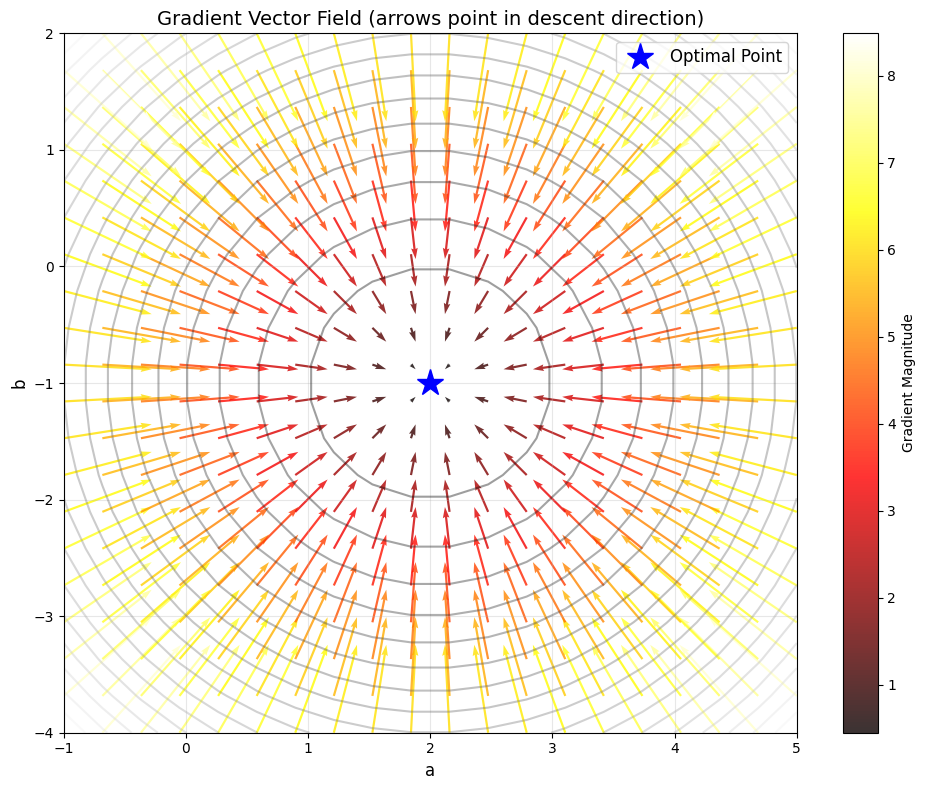

In [ ]:
# 3. Vector Field Visualization - Show gradients everywhere!
fig, ax = plt.subplots(figsize=(10, 8))

# Create a grid
a_range = np.linspace(-1, 5, 20)
b_range = np.linspace(-4, 2, 20)
A, B = np.meshgrid(a_range, b_range)

# Compute gradients at each point
# For L = (a-2)^2 + (b+1)^2
# dL/da = 2(a-2), dL/db = 2(b+1)
grad_A = 2 * (A - 2)
grad_B = 2 * (B + 1)

# Compute gradient magnitude for coloring
magnitude = np.sqrt(grad_A**2 + grad_B**2)

# Plot contours
L = loss_function(A, B)
contour = ax.contour(A, B, L, levels=20, cmap='gray', alpha=0.4)

# Plot vector field (negative gradients = descent direction)
quiver = ax.quiver(A, B, -grad_A, -grad_B, magnitude, 
                   cmap='hot', alpha=0.8, scale=50, width=0.003)

ax.plot(2, -1, 'b*', markersize=20, label='Optimal Point')
ax.set_xlabel('a', fontsize=12)
ax.set_ylabel('b', fontsize=12)
ax.set_title('Gradient Vector Field (arrows point in descent direction)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(quiver, ax=ax)
cbar.set_label('Gradient Magnitude', fontsize=10)

plt.tight_layout()
plt.show()

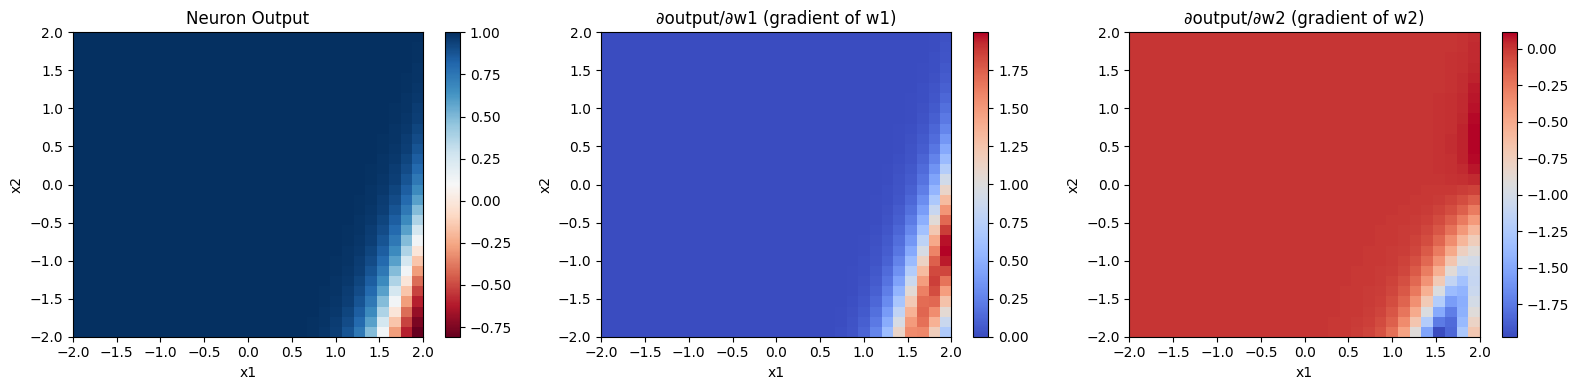

In [ ]:
# 4. Gradient Heatmap - Visualize gradient flow in neural net
# Let's compute gradients for multiple inputs and visualize

# Create a simple neural net computation
def neural_net(x1, x2, w1, w2, b):
    """Simple neuron: output = tanh(x1*w1 + x2*w2 + b)"""
    a = Value(x1, label='x1')
    b_val = Value(x2, label='x2')
    c = Value(w1, label='w1')
    d = Value(w2, label='w2')
    e = Value(b, label='b')
    
    out = (a * c + b_val * d + e).tanh()
    out.label = 'output'
    out.backward()
    
    return {
        'output': out.data,
        'grad_x1': a.grad,
        'grad_x2': b_val.grad,
        'grad_w1': c.grad,
        'grad_w2': d.grad,
        'grad_b': e.grad
    }

# Test across different inputs
x1_range = np.linspace(-2, 2, 30)
x2_range = np.linspace(-2, 2, 30)

# Fixed weights
w1, w2, b = -3.0, 1.0, 6.88

grad_w1_map = np.zeros((len(x2_range), len(x1_range)))
grad_w2_map = np.zeros((len(x2_range), len(x1_range)))
output_map = np.zeros((len(x2_range), len(x1_range)))

for i, x2 in enumerate(x2_range):
    for j, x1 in enumerate(x1_range):
        result = neural_net(x1, x2, w1, w2, b)
        grad_w1_map[i, j] = result['grad_w1']
        grad_w2_map[i, j] = result['grad_w2']
        output_map[i, j] = result['output']

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

im1 = axes[0].imshow(output_map, extent=[-2, 2, -2, 2], origin='lower', cmap='RdBu', aspect='auto')
axes[0].set_title('Neuron Output', fontsize=12)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(grad_w1_map, extent=[-2, 2, -2, 2], origin='lower', cmap='coolwarm', aspect='auto')
axes[1].set_title('∂output/∂w1 (gradient of w1)', fontsize=12)
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(grad_w2_map, extent=[-2, 2, -2, 2], origin='lower', cmap='coolwarm', aspect='auto')
axes[2].set_title('∂output/∂w2 (gradient of w2)', fontsize=12)
axes[2].set_xlabel('x1')
axes[2].set_ylabel('x2')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
# 5. Side-by-side comparison with PyTorch! 
# Let's verify our implementation matches PyTorch

try:
    import torch
    has_pytorch = True
except ImportError:
    has_pytorch = False
    print("PyTorch not installed. Install with: pip install torch")

if has_pytorch:
    print("🔥 Comparing our micrograd with PyTorch! 🔥\n")
    
    # Our implementation
    print("=" * 50)
    print("OUR MICROGRAD:")
    print("=" * 50)
    a_ours = Value(2.0, label='a')
    b_ours = Value(-3.0, label='b')
    c_ours = Value(10.0, label='c')
    e_ours = a_ours * b_ours
    d_ours = e_ours + c_ours
    f_ours = Value(-2.0, label='f')
    L_ours = d_ours * f_ours
    L_ours.backward()
    
    print(f"L = {L_ours.data}")
    print(f"dL/da = {a_ours.grad}")
    print(f"dL/db = {b_ours.grad}")
    print(f"dL/dc = {c_ours.grad}")
    print(f"dL/df = {f_ours.grad}")
    
    # PyTorch implementation
    print("\n" + "=" * 50)
    print("PYTORCH:")
    print("=" * 50)
    a_torch = torch.tensor(2.0, requires_grad=True)
    b_torch = torch.tensor(-3.0, requires_grad=True)
    c_torch = torch.tensor(10.0, requires_grad=True)
    f_torch = torch.tensor(-2.0, requires_grad=True)
    
    e_torch = a_torch * b_torch
    d_torch = e_torch + c_torch
    L_torch = d_torch * f_torch
    L_torch.backward()
    
    print(f"L = {L_torch.item()}")
    print(f"dL/da = {a_torch.grad.item()}")
    print(f"dL/db = {b_torch.grad.item()}")
    print(f"dL/dc = {c_torch.grad.item()}")
    print(f"dL/df = {f_torch.grad.item()}")
    
    # Comparison
    print("\n" + "=" * 50)
    print("✅ VERIFICATION:")
    print("=" * 50)
    print(f"L matches: {abs(L_ours.data - L_torch.item()) < 1e-6}")
    print(f"dL/da matches: {abs(a_ours.grad - a_torch.grad.item()) < 1e-6}")
    print(f"dL/db matches: {abs(b_ours.grad - b_torch.grad.item()) < 1e-6}")
    print(f"dL/dc matches: {abs(c_ours.grad - c_torch.grad.item()) < 1e-6}")
    print(f"dL/df matches: {abs(f_ours.grad - f_torch.grad.item()) < 1e-6}")
    print("\n🎉 Our micrograd matches PyTorch exactly! 🎉")
else:
    print("Skipping PyTorch comparison (not installed)")

🔥 Comparing our micrograd with PyTorch! 🔥

OUR MICROGRAD:
L = -8.0
dL/da = 6.0
dL/db = -4.0
dL/dc = -2.0
dL/df = 4.0

PYTORCH:
L = -8.0
dL/da = 6.0
dL/db = -4.0
dL/dc = -2.0
dL/df = 4.0

✅ VERIFICATION:
L matches: True
dL/da matches: True
dL/db matches: True
dL/dc matches: True
dL/df matches: True

🎉 Our micrograd matches PyTorch exactly! 🎉


# Interactive Forward & Backward Pass! 🎮

Watch the computation flow in real-time!